# Best Practices for NLP

In [60]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure
%matplotlib inline

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/farid/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import *
from gensim.models.phrases import Phraser, Phrases
from keras.preprocessing.text import one_hot

/home/farid/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/farid/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#### Load data 

In [10]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /home/farid/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [27]:
from nltk.corpus import gutenberg

In [28]:
gberg_sents = gutenberg.sents()

In [29]:
gberg_sents[4]

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [30]:
[w.lower() for w in gberg_sents[4]]

['she',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [31]:
stpwrds = stopwords.words('english') + list(string.punctuation)

In [32]:
[w.lower() for w in gberg_sents[4] if w not in stpwrds]

['she',
 'youngest',
 'two',
 'daughters',
 'affectionate',
 'indulgent',
 'father',
 'consequence',
 'sister',
 'marriage',
 'mistress',
 'house',
 'early',
 'period']

In [33]:
stemmer = PorterStemmer()

In [34]:
[stemmer.stem(w.lower()) for w in gberg_sents[4] if w not in stpwrds]

['she',
 'youngest',
 'two',
 'daughter',
 'affection',
 'indulg',
 'father',
 'consequ',
 'sister',
 'marriag',
 'mistress',
 'hous',
 'earli',
 'period']

handle bigram collocations:

In [37]:
phrases = Phrases(gberg_sents)

In [39]:
bigrams = Phraser(phrases)

In [47]:
bigrams.phrasegrams 

{(b'two', b'daughters'): (19, 11.966813731181546),
 (b'her', b'sister'): (195, 17.7960829227865),
 (b"'", b's'): (9781, 31.066242737744524),
 (b'very', b'early'): (24, 11.01214147275924),
 (b'Her', b'mother'): (14, 13.529425062715127),
 (b'long', b'ago'): (38, 63.22343628984788),
 (b'more', b'than'): (541, 29.023584433996874),
 (b'had', b'been'): (1256, 22.306024648925288),
 (b'an', b'excellent'): (54, 39.063874851750626),
 (b'Miss', b'Taylor'): (48, 453.75918026073305),
 (b'very', b'fond'): (28, 24.134280468850747),
 (b'passed', b'away'): (25, 12.35053642325912),
 (b'too', b'much'): (173, 31.376002029426687),
 (b'did', b'not'): (935, 11.728416217142811),
 (b'any', b'means'): (27, 14.096964108090186),
 (b'wedding', b'-'): (15, 17.4695197740113),
 (b'Her', b'father'): (18, 13.129571562488772),
 (b'after', b'dinner'): (21, 21.5285481168817),
 (b'self', b'-'): (124, 47.79018053120332),
 (b'sixteen', b'years'): (12, 107.0461671612265),
 (b'five', b'years'): (42, 40.128755673408115),
 (b'ye

In [48]:
bigram["I live in New York City".split()]

['I', 'live', 'in', 'New_York', 'City']

#### Preprocess the corpus

In [50]:
lower_sents = []
for s in gberg_sents:
    lower_sents.append([w.lower() for w in s if w not in list(string.punctuation)])

In [51]:
lower_sents[:5]

[['emma', 'by', 'jane', 'austen', '1816'],
 ['volume', 'i'],
 ['chapter', 'i'],
 ['emma',
  'woodhouse',
  'handsome',
  'clever',
  'and',
  'rich',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her'],
 ['she',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  'indulgent',
  'father',
  'and',
  'had',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  's',
  'marriage',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period']]

In [52]:
lower_bigram = Phraser(Phrases(lower_sents))

In [53]:
lower_bigram.phrasegrams

{(b'two', b'daughters'): (19, 11.080802900992637),
 (b'her', b'sister'): (201, 16.93971298099339),
 (b'very', b'early'): (25, 10.516998773665177),
 (b'her', b'mother'): (253, 10.70812618607742),
 (b'long', b'ago'): (38, 59.226442015336005),
 (b'more', b'than'): (562, 28.529926612065935),
 (b'had', b'been'): (1260, 21.583193129694834),
 (b'an', b'excellent'): (58, 37.41859680854167),
 (b'sixteen', b'years'): (15, 131.42913000977515),
 (b'miss', b'taylor'): (48, 420.4340982546865),
 (b'mr', b'woodhouse'): (132, 104.19907841850323),
 (b'very', b'fond'): (30, 24.185726346489627),
 (b'passed', b'away'): (25, 11.751473221742694),
 (b'too', b'much'): (177, 30.36309017383541),
 (b'did', b'not'): (977, 10.846196223896685),
 (b'any', b'means'): (28, 14.294148100212627),
 (b'after', b'dinner'): (22, 18.60737125272944),
 (b'mr', b'weston'): (162, 91.63290824201266),
 (b'five', b'years'): (42, 37.66428596665674),
 (b'years', b'old'): (176, 48.599094446190286),
 (b'seven', b'years'): (53, 50.3345604

In [54]:
lower_bigram["jon lives in new york city".split()]

['jon', 'lives', 'in', 'new_york', 'city']

In [55]:
lower_bigram = Phraser(Phrases(lower_sents, min_count=32, threshold=64))

In [56]:
lower_bigram.phrasegrams

{(b'afar', b'off'): (52, 108.14220347465505),
 (b'burnt', b'offering'): (184, 297.524653753951),
 (b'burnt', b'offerings'): (86, 299.15702343127646),
 (b'buster', b'bear'): (142, 479.87410772225826),
 (b'captain', b'benwick'): (56, 241.49037086312987),
 (b'captain', b'wentworth'): (196, 529.8756608388247),
 (b'charles', b'hayter'): (33, 92.03437785214481),
 (b'chief', b'priests'): (65, 116.31947753846512),
 (b'colonel', b'brandon'): (132, 1313.0078125),
 (b'couldn', b't'): (89, 171.76138536935215),
 (b'cut', b'off'): (217, 129.60290535032792),
 (b'dare', b'say'): (115, 89.94000515807346),
 (b'de', b'grey'): (77, 603.2109624246722),
 (b'didn', b't'): (180, 220.51081560283686),
 (b'doesn', b't'): (53, 106.2634985949418),
 (b'don', b't'): (830, 250.30957446808512),
 (b'dr', b'bull'): (65, 680.7870294599019),
 (b'dr', b'middleton'): (40, 162.73103819257668),
 (b'drawing', b'room'): (49, 84.91494947493561),
 (b'farmer', b'brown'): (100, 386.05179596892236),
 (b'father', b'brown'): (207, 91.

In [57]:
clean_sents = []
for s in lower_sents:
    clean_sents.append(lower_bigram[s])

#### Run Word2Vec

In [61]:
model = Word2Vec(sentences=clean_sents, size=64, sg=1, window=10, min_count=10, seed=42, workers=8)
model.save('clean_gutenberg_model.w2v')

In [71]:
model = gensim.models.Word2Vec.load('clean_gutenberg_model.w2v')

In [72]:
len(model.wv.vocab)

10329

#### Explore model

In [73]:
model.wv['ma_am']

array([-0.10738685, -0.24389324, -0.22116576,  0.38292003, -0.07693114,
        0.182057  ,  0.0941761 , -0.15450037,  0.06562704, -0.75891113,
       -0.01242721,  0.5801102 , -0.09588667, -0.06237296,  0.4516282 ,
        0.3488325 ,  0.36470887,  0.10491737,  0.60163283, -0.66157585,
       -0.23609574,  0.42192158,  0.14395694, -0.3018632 ,  0.11171307,
        0.23089665, -0.10358223,  0.46322876, -0.4868463 ,  0.06606773,
       -0.00357602,  0.42759544,  0.22310212,  0.9577573 , -0.05483427,
        0.5793584 , -0.12607658, -0.31608582, -0.2474891 ,  0.07496309,
       -0.07807403, -0.11823207,  0.3722307 , -0.15603392, -0.71650225,
       -0.10360477, -0.46135613, -0.0098235 ,  0.43703824,  0.42062533,
       -0.3558332 ,  0.26430896, -0.06099987, -0.03734838, -0.02184332,
       -0.12956634,  0.04744508,  0.19825514,  0.14685586,  0.08109929,
        0.20512687, -0.58752924, -0.5770574 , -0.29814014], dtype=float32)

In [74]:
model.wv.most_similar(positive=['ma_am','man'],negative=['woman'])

[('wilkinson', 0.7438286542892456),
 ('todhunter', 0.7188078165054321),
 ('angrily', 0.715451717376709),
 ('sir', 0.7106932997703552),
 ('anyhow', 0.704780101776123),
 ('hatter', 0.6999880075454712),
 ('but', 0.6993914842605591),
 ('sergeant', 0.6989513039588928),
 ('frog', 0.6976158618927002),
 ('hutton', 0.697052001953125)]

In [75]:
model.wv.most_similar(positive=['father','woman'],negative=['man'])

[('sister', 0.7628308534622192),
 ('mother', 0.7523478269577026),
 ('wife', 0.7274695634841919),
 ('husband', 0.712470531463623),
 ('daughter', 0.7112700343132019),
 ('sarah', 0.7066226005554199),
 ('daughters', 0.7016441822052002),
 ('rachel', 0.6979457139968872),
 ('loved', 0.6810435652732849),
 ('nurse', 0.677442729473114)]

#### Reduce dimensionality

In [76]:
tsne = TSNE(n_components=2, n_iter=1000)

In [77]:
X_2d = tsne.fit_transform(model.wv[model.wv.vocab])

In [78]:
coords_df = pd.DataFrame(X_2d, columns=['x','y'])
coords_df['token'] = model.wv.vocab.keys()

In [79]:
coords_df.head()

,x,y,token
0,48.709476,39.224411,emma
1,27.481035,-24.162130,by
2,51.741711,36.209221,jane
3,21.492460,-4.184100,volume
4,-5.287694,40.781452,i


In [80]:
coords_df.to_csv('clean_gutenberg_tsne.csv', index=False)

In [81]:
coords_df =  pd.read_csv('clean_gutenberg_tsne.csv')

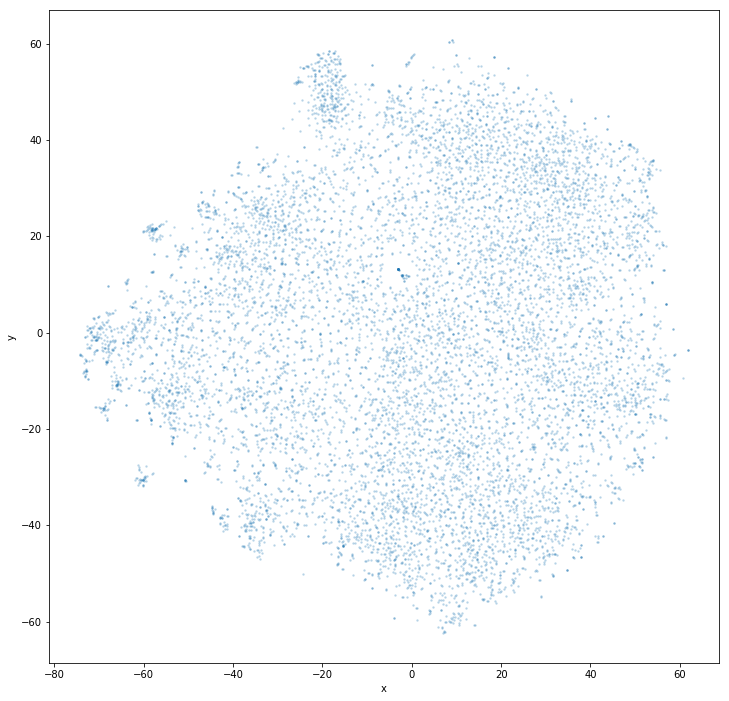

In [82]:
_ = coords_df.plot.scatter('x', 'y', figsize=(12,12), marker='.', s=10, alpha=0.2)

In [83]:
output_notebook()

Loading BokehJS ...

In [84]:
subset_df = coords_df.sample(n=5000)

In [85]:
p = figure(plot_width=800, plot_height=800)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

In [86]:
show(p)

In [89]:
output_file('w2v.html')

In [91]:
show(p)